# 3 Double when 2 win or 1 lose 

In [16]:
from tabulate import tabulate
def bet_history_table(strategy, bankroll):

    # Initialize statistics lists
    num_games_played = []
    max_bankrolls = []
    min_bankrolls = []
    final_bankrolls = []

    # Number of Stimulations
    times = 1

    for i in range(times):
        bankroll_history, bet_history, outcome_history, color_history,  consecutive_wins, consecutive_losses = strategy(bankroll)
        # Statistic 
        num_games_played.append(len(bankroll_history))
        max_bankrolls.append(max(bankroll_history))
        min_bankrolls.append(min(bankroll_history))
        final_bankrolls.append(bankroll_history[-1])

    # Combine the histories into a list of tuples
    data = list(zip(bankroll_history, bet_history, outcome_history, color_history, consecutive_wins, consecutive_losses))

    # Create headers for the table
    headers = ["Bankroll", "Bet Amount", "Outcome", "Color History", "consecutive_wins", "consecutive_losses"]

    # Create the table using tabulate
    table = tabulate(data, headers=headers, tablefmt="grid")

    print(table)

    # Set the figure size
    plt.figure(figsize=(11.7, 8.27))

    # Create subplots
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)

    # Display statistics
    ax1.plot(bankroll_history, linewidth=2)
    ax2.plot(bet_history, linewidth=2)
    
    print("Statistics:")
    print(f"Number of games played: {num_games_played}")
    print(f"Maximum bankrolls: {max_bankrolls}")
    print(f"Minimum bankrolls: {min_bankrolls}")
    print(f"Final bankrolls: {final_bankrolls}")

    # Set tick parameters for x and y axes
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax2.tick_params(axis='both', which='major', labelsize=16)

    ax1.set_ylabel("Bankroll", fontsize=18, fontweight="bold")
    ax1.set_xlabel("Number of Games", fontsize=18, fontweight="bold")
    ax1.set_title("Bankroll Over Time", fontsize=22, fontweight="bold")

    ax2.set_xlabel("Number of Games", fontsize=18, fontweight="bold")
    ax2.set_ylabel("Bet Amount", fontsize=18, fontweight="bold")
    ax2.set_title("Bet Amount Over Time", fontsize=22, fontweight="bold")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

In [17]:
import random
import matplotlib.pyplot as plt

def martingale(bankroll):
    minimum_bet = 3
    bet = minimum_bet
    cap = 1000  # Set the maximum betting cap
    pockets = ["Red"] * 18 + ["Black"] * 18 + ["Green 0"] 
    bankroll_history = []
    bet_history = []
    outcome_history = []
    color_history = []
    consecutive_wins_list = []
    consecutive_losses_list = []
    consecutive_wins = 0
    consecutive_losses = 0
    
    # Initialize the initial bankroll to track return percentage
    initial_bankroll = bankroll
    
    while bankroll > 0 and (bankroll - initial_bankroll) / initial_bankroll < 1:
        roll = random.choice(pockets)
        color_history.append(roll)

        if bet > bankroll or bet < minimum_bet or bet > cap: # or len(bet_history) >= 50: # 50 bet == 1 hr
            break  # Stop the program if the next bet would be over the bankroll or smaller the bankroll
        
        if len(bet_history) >= 2:
            if (consecutive_wins >= 2 and consecutive_wins % 2 == 0):
                bet = bet_history[-1] * 2
            elif consecutive_losses >=1:
                bet = consecutive_losses * minimum_bet *2
            elif consecutive_wins >= 2 and consecutive_wins % 2 == 1:
                bet = bet_history[-1]

        if roll == "Red": 
            bankroll += bet
            outcome_history.append("Win")
            consecutive_wins += 1
            consecutive_losses = 0
        else:
            outcome_history.append("Loss")
            bankroll -= bet
            consecutive_losses += 1
            consecutive_wins = 0
        
        consecutive_losses_list.append(consecutive_losses)
        consecutive_wins_list.append(consecutive_wins)
        bet_history.append(bet)
        bankroll_history.append(bankroll)
    
    return bankroll_history, bet_history, outcome_history, color_history, consecutive_wins_list, consecutive_losses_list


+------------+--------------+-----------+-----------------+--------------------+----------------------+
|   Bankroll |   Bet Amount | Outcome   | Color History   |   consecutive_wins |   consecutive_losses |
+============+==============+===========+=================+====================+======================+
|        203 |            3 | Win       | Red             |                  1 |                    0 |
+------------+--------------+-----------+-----------------+--------------------+----------------------+
|        200 |            3 | Loss      | Black           |                  0 |                    1 |
+------------+--------------+-----------+-----------------+--------------------+----------------------+
|        206 |            6 | Win       | Red             |                  1 |                    0 |
+------------+--------------+-----------+-----------------+--------------------+----------------------+
|        200 |            6 | Loss      | Black           |     

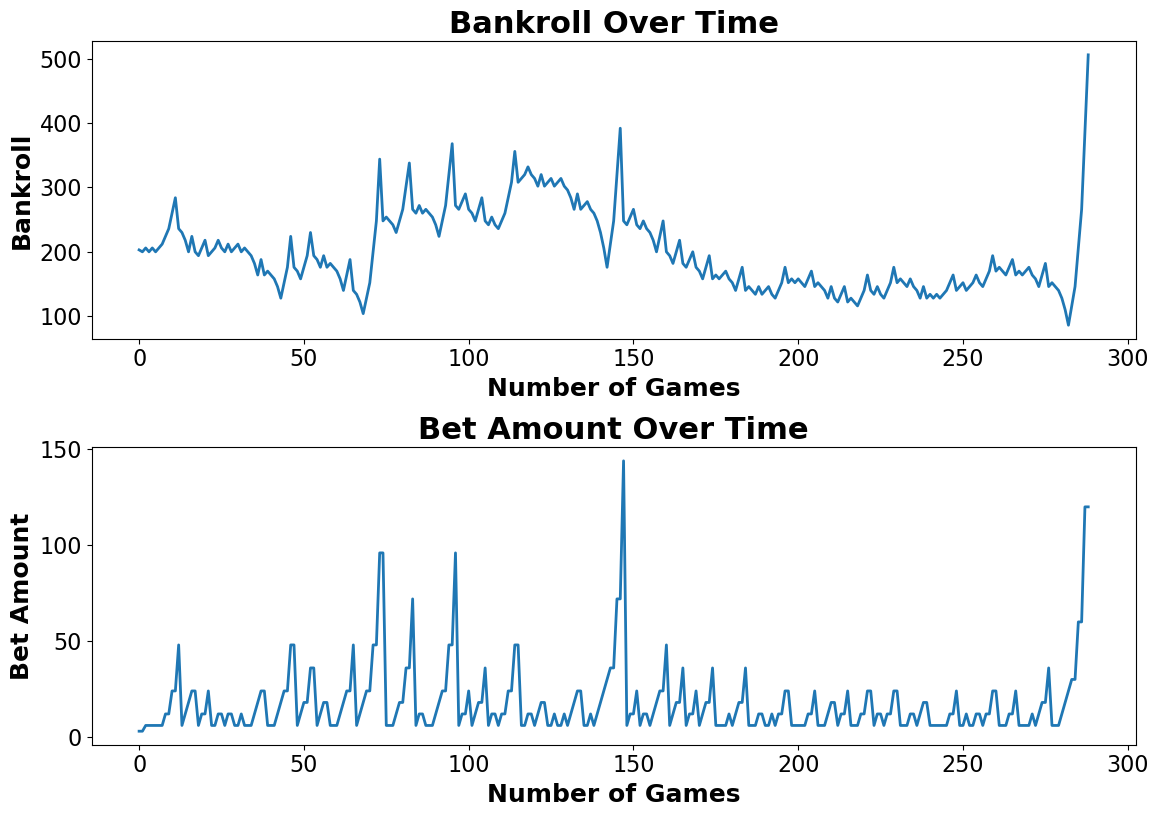

In [18]:
bet_history_table(martingale, 200)

Total Wins: 2
Overall Win Rate: 20.00%
Total Losses: 8
Overall Lose Rate: 80.00%
Total Profit/Loss: -11016


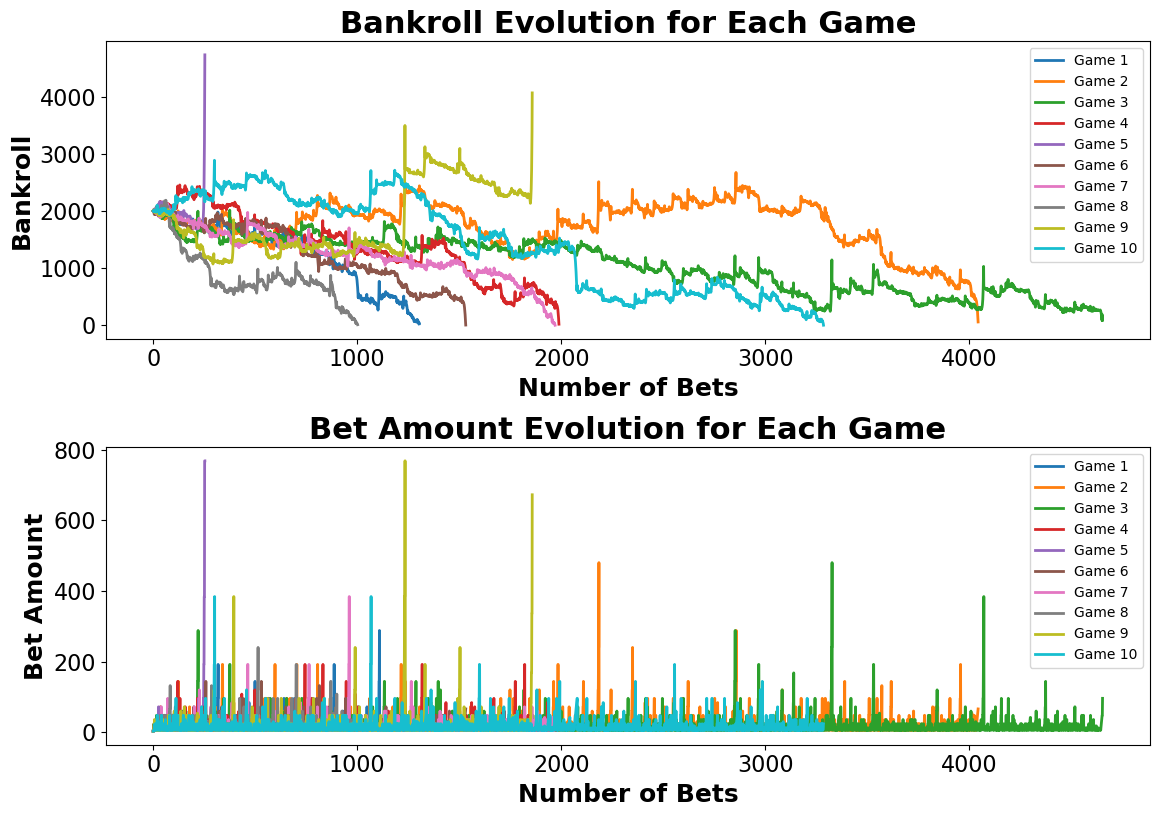

In [19]:
def bet_history_times(strategy, bankroll, times):

    # Initialize statistics lists
    num_games_played = []
    max_bankrolls = []
    min_bankrolls = []
    final_bankrolls = []
    total_wins = 0
    total_losses = 0
    total_profit_loss = 0  # Initialize total profit/loss

    # Set the figure size
    plt.figure(figsize=(11.7, 8.27))

    # Create subplots
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)

    # Number of Stimulations
    for i in range(times):
        bankroll_history, bet_history, outcome_history, color_history, consecutive_wins, consecutive_losses = strategy(bankroll)
        # Statistic 
        num_games_played.append(len(bankroll_history))
        max_bankrolls.append(max(bankroll_history))
        min_bankrolls.append(min(bankroll_history))
        final_bankrolls.append(bankroll_history[-1])

        ax1.plot(bankroll_history, linewidth=2, label=f"Game {i+1}")
        ax2.plot(bet_history, linewidth=2, label=f"Game {i+1}")

        if outcome_history[-1] == "Win":
            total_wins += 1
        else:
            total_losses += 1

        # Calculate profit/loss for the game
        total_profit_loss += bankroll_history[-1] - bankroll

    overall_win_rate = total_wins / times
    overall_lose_rate = total_losses / times

    print("Total Wins:", total_wins)
    print(f"Overall Win Rate: {overall_win_rate:.2%}")
    print("Total Losses:", total_losses)
    print(f"Overall Lose Rate: {overall_lose_rate:.2%}")
    print("Total Profit/Loss:", total_profit_loss)

    # Set tick parameters for x and y axes
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax2.tick_params(axis='both', which='major', labelsize=16)

    ax1.set_ylabel("Bankroll", fontsize=18, fontweight="bold")
    ax1.set_xlabel("Number of Bets", fontsize=18, fontweight="bold")
    ax1.set_title("Bankroll Evolution for Each Game", fontsize=22, fontweight="bold")
    ax1.legend()

    ax2.set_xlabel("Number of Bets", fontsize=18, fontweight="bold")
    ax2.set_ylabel("Bet Amount", fontsize=18, fontweight="bold")
    ax2.set_title("Bet Amount Evolution for Each Game", fontsize=22, fontweight="bold")
    ax2.legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Call the function with your chosen strategy, initial bankroll, and number of stimulations
bet_history_times(martingale, 2000, 10)


# Unlimited game tester

In [20]:
def bet_history_times(strategy, bankroll, times):

    # Initialize statistics lists
    num_games_played = []
    max_bankrolls = []
    min_bankrolls = []
    final_bankrolls = []
    total_wins = 0
    total_losses = 0
    total_draws = 0
    total_profit_loss = 0  # Initialize total profit/loss

    # Number of Stimulations
    for i in range(times):
        bankroll_history, bet_history, outcome_history, color_history, consecutive_wins, consecutive_losses = strategy(bankroll)
        # Statistic 
        num_games_played.append(len(bankroll_history))
        max_bankrolls.append(max(bankroll_history))
        min_bankrolls.append(min(bankroll_history))
        final_bankrolls.append(bankroll_history[-1])

        if bankroll_history[-1] == bankroll:
            total_draws += 1
        elif bankroll_history[-1] > bankroll:
            total_wins +=1
        else:
            total_losses += 1

        # Calculate profit/loss for the game
        total_profit_loss += bankroll_history[-1] - bankroll

    overall_win_rate = total_wins / times
    overall_lose_rate = total_losses / times

    print("Total Wins:", total_wins)
    print(f"Overall Win Rate: {overall_win_rate:.2%}")
    print("Total Losses:", total_losses)
    print(f"Overall Lose Rate: {overall_lose_rate:.2%}")
    print("Total Profit/Loss:", total_profit_loss)
    print("Total draws:", total_draws)

# Call the function with your chosen strategy, initial bankroll, and number of stimulations
bet_history_times(martingale, 2000, 5000)


Total Wins: 775
Overall Win Rate: 15.50%
Total Losses: 4224
Overall Lose Rate: 84.48%
Total Profit/Loss: -6546426
Total draws: 1
